In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [14]:
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [15]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8600,710,0,1,43,9,128284.45,1,1,0,32996.89,1
3756,755,0,1,31,5,0.00,2,0,1,194660.78,0
9031,541,0,1,39,7,0.00,2,1,0,19823.02,0
1803,577,0,0,26,1,180530.51,1,0,0,123454.62,0
5644,738,2,0,37,8,100565.94,1,1,1,128799.86,0
1583,709,0,0,43,8,0.00,2,0,0,168035.62,1
5250,462,1,0,24,9,69881.09,2,0,1,64421.02,0
3321,682,0,1,30,9,0.00,2,1,1,2053.42,0
6774,656,0,0,48,9,0.00,2,1,1,85240.61,1
2926,510,0,1,63,8,0.00,2,1,1,115291.86,0


In [16]:
df = pd.get_dummies(df,columns = ['Geography'],drop_first = True)

In [17]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [18]:
X=df.drop(columns=['Exited'],axis=1).values
y= df['Exited'].values

In [19]:
 X

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [20]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X = scaler.fit_transform(X)

In [23]:
X


array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.02188649,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ...,  0.21653375,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.2406869 ,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.00864308,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -0.12523071,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ..., -1.07636976,
        -0.57873591, -0.57380915]])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [26]:
model = Sequential()

In [27]:
X.shape

(10000, 11)

In [28]:
model.add(Dense(11,activation = 'relu',input_dim=X_train.shape[1]))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [29]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [33]:
history = model.fit(X_train,y_train,batch_size = 50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 0.5673 - accuracy: 0.7761 - val_loss: 0.5013 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7958 - val_loss: 0.4687 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7973 - val_loss: 0.4530 - val_accuracy: 0.8000
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8028 - val_loss: 0.4436 - val_accuracy: 0.8025
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8044 - val_loss: 0.4358 - val_accuracy: 0.8031
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8072 - val_loss: 0.4285 - val_accuracy: 0.8031
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8130 - val_loss: 0.4198 - val_accuracy: 0.8112

In [43]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=-1)

63/63 [==============================] - 0s 1ms/step


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [37]:
import matplotlib.pylab as plt

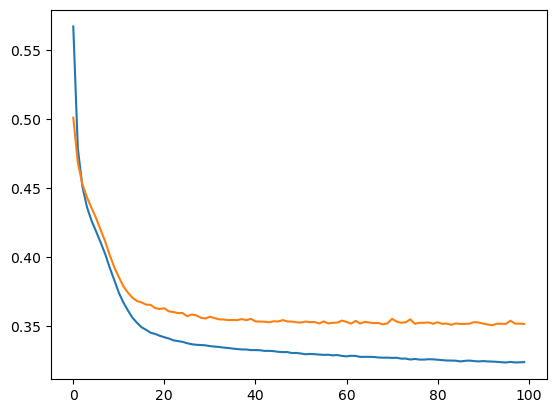

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [40]:
history.history

{'loss': [0.5673328042030334,
  0.4790240526199341,
  0.45139503479003906,
  0.43649932742118835,
  0.42660412192344666,
  0.4188496768474579,
  0.41086238622665405,
  0.4024001359939575,
  0.3924931287765503,
  0.38350117206573486,
  0.3743487298488617,
  0.3672209680080414,
  0.36144500970840454,
  0.35619500279426575,
  0.35245224833488464,
  0.3492763638496399,
  0.34736812114715576,
  0.3452815115451813,
  0.3443855941295624,
  0.34307289123535156,
  0.3420301079750061,
  0.34110140800476074,
  0.33976760506629944,
  0.3392327129840851,
  0.3386804163455963,
  0.3376902639865875,
  0.33693885803222656,
  0.33655983209609985,
  0.33638206124305725,
  0.3361677825450897,
  0.33560314774513245,
  0.33525145053863525,
  0.33498165011405945,
  0.334516704082489,
  0.3342205286026001,
  0.3338111937046051,
  0.33345547318458557,
  0.33318030834198,
  0.3331628739833832,
  0.332691490650177,
  0.33273234963417053,
  0.33258944749832153,
  0.33212706446647644,
  0.3321361839771271,
  0.33

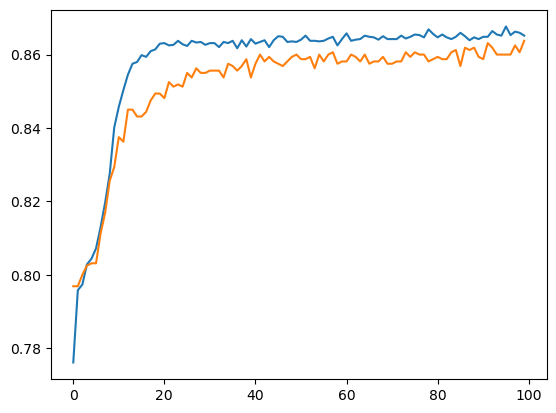

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])